In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("H:/My Drive/M.Sc. BDA/Research_BDA/Sem_2/NirmaSales_TimeSeries_NA.csv", parse_dates = ['Month_Year'], index_col = 'Month_Year')
data

,Sales
Month_Year,
Jan-15,117730.0
Feb-15,140832.5
Mar-15,181632.5
Apr-15,113061.5
May-15,143101.0
...,...
Aug-22,NaN
Sep-22,387657.0
Oct-22,323620.0


<AxesSubplot: xlabel='Month_Year'>

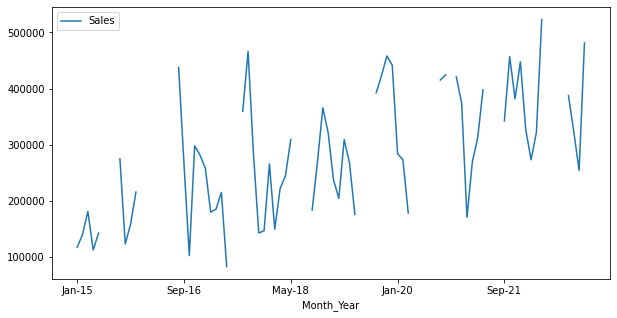

In [3]:
data.plot(figsize = (10,5))

In [4]:
data = data.dropna()

<AxesSubplot: xlabel='Month_Year'>

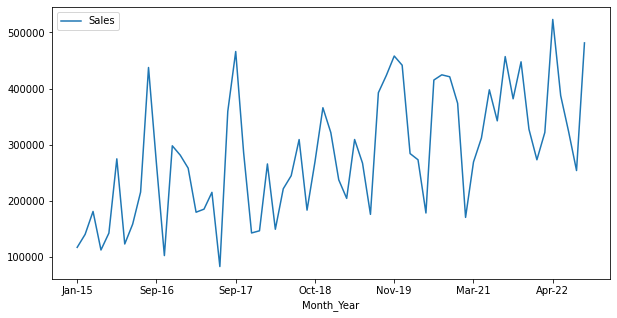

In [5]:
data.plot(figsize = (10,5))

In [6]:
data.describe()

,Sales
count,65.000000
mean,284247.600000
std,110977.849999
min,83626.500000
25%,183954.000000
50%,273524.000000
75%,373883.000000
max,523098.500000


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1080x2160 with 0 Axes>

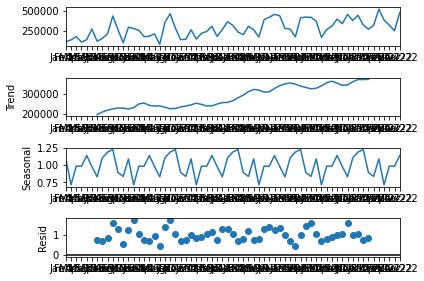

In [8]:
plt.figure(figsize = (15,30))
decompose = seasonal_decompose(data,model='multiplicative', period=12)

decompose.plot();



In [9]:
# ACF and PACF plots

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


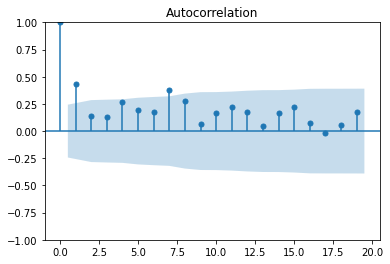

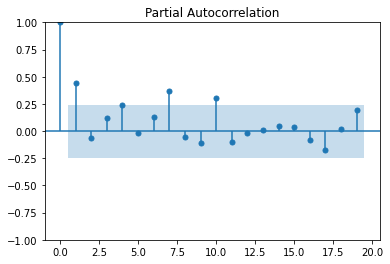

In [10]:
plot_acf(data);
plot_pacf(data);

In [11]:
#To check stationarity using test-staistic and p-value , we use ADF test:-

In [12]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

In [13]:
adf_test(data['Sales'])

ADF Statistic: -0.7031747202979451
p-value: 0.8459254990846926
The series is non-stationary.


In [14]:
# From Ad-Fuller test, as p-value = 0.84 > alpha = 0.05, we can say that the data is not stationary.

In [15]:
data['diff1'] = data['Sales'].diff(1)

C:\Users\DivyaKotia\AppData\Local\Temp\ipykernel_10648\1385831516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diff1'] = data['Sales'].diff(1)


<AxesSubplot: xlabel='Month_Year'>

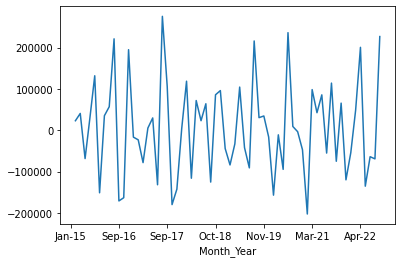

In [16]:
data['diff1'].plot()

# From first differencing, trend has been eliminated.

In [17]:
diff1 = data['diff1'].dropna()

In [18]:
adf_test(data['diff1'])

ADF Statistic: -5.400921244223641
p-value: 3.3721454569770597e-06
The series is stationary.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


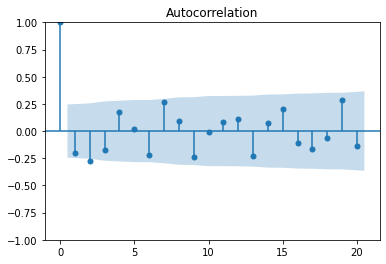

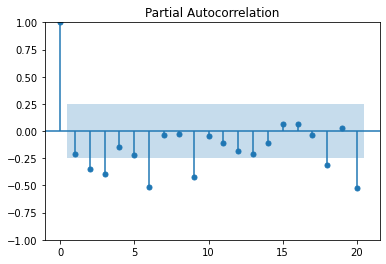

In [19]:
plot_acf(diff1, lags = 20);
plot_pacf(diff1, lags = 20);

In [20]:
# Interpretation:

# Differencing = 1 (d = 1)
# MA(q) = 1 (Based on the 1st lag in the ACF plot)
# AR(p) = 1 (Based on the 1st lag in the PACF plot)

In [21]:
# To remove the some trace of seasonality after the 1st difference.

C:\Users\DivyaKotia\AppData\Local\Temp\ipykernel_10648\1676727449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Seasonal_Diff'] = diff1.diff(12)


<AxesSubplot: xlabel='Month_Year'>

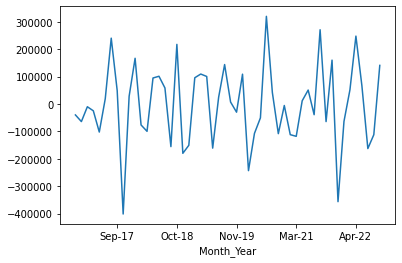

In [73]:
data['Seasonal_Diff'] = diff1.diff(12)

data['Seasonal_Diff'].plot()

In [74]:
adf_test(data['Seasonal_Diff'])

ADF Statistic: -2.600707950822824
p-value: 0.09285103666233202
The series is non-stationary.


In [77]:
'''Since the series again became non-stationary this suggest that we have
over differenced the series, so we don't need to do the seasonal differencing'''

# So, we will try to fit the ARIMA model.

# Specifically, ARIMA(1,1,1)

"Since the series again became non-stationary this suggest that the we have\nover differenced the series, so we don't need to do the seasonal differencing"

### Model Fitting

In [148]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [149]:
model_ARIMA = ARIMA(data['Sales'], order=(1, 1, 1))
modelArima_fit = model.fit()

print(modelArima_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   65
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -824.140
Date:                            Fri, 06 Dec 2024   AIC                           1658.279
Time:                                    11:57:42   BIC                           1669.074
Sample:                                         0   HQIC                          1662.532
                                             - 65                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2812      0.205      1.370      0.171      -0.121       0.684
ma.L1         -0.8718      0.116   

In [80]:
#Now we will fit model which is SARIMA(Because of seasonality):-

In [81]:
import statsmodels.api as sm

In [150]:
model_SARIMA = sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,1,1),seasonal_order=(1,0,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [151]:
modelSarima_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [152]:
modelSarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   65
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -824.140
Date:                            Fri, 06 Dec 2024   AIC                           1658.279
Time:                                    11:58:28   BIC                           1669.074
Sample:                                         0   HQIC                          1662.532
                                             - 65                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2812      0.205      1.370      0.171      -0.121       0.684
ma.L1         -0.8718      0.116     -7.538      0.000      -1.098      -0.645
ar.S.L12      -0.5450      0.691     -0.789      0.430      -1.899       0.809
ma.S.L12       0.8155      0.722      1.129      0.259      -0.600       2.231
sigma2      1.001e+10   2.12e-10   4.72e+19      0.000       1e+10       1e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.94   Prob(JB):                         0.60
Heteroskedasticity (H):               0.85   Skew:                             0.27
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.64e+35. Standard errors may be unstable.
"""

In [153]:
!pip install pmdarima 

Defaulting to user installation because normal site-packages is not writeable


In [85]:
# Using AutoArima to find the best parameters

In [86]:
# import necessary libraries
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [90]:
# set seasonal to True
seasonal = True

# use pmdarima to automatically select best parameters for the model.
autoarima_model = pm.auto_arima(data['Sales'], 
                      m=12,               # frequency of series                      
                      seasonal=seasonal,  # TRUE if seasonal series
                      d=1,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=1, # minimum p and q
                      max_p=12, max_q=12, # maximum p and q
                      D=1,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# print model summary
print(autoarima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1371.338, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1387.600, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1382.407, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1369.354, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1380.860, Time=0.03 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1371.322, Time=0.40 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1376.017, Time=0.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1372.386, Time=0.58 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1375.747, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1364.758, Time=0.45 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1375.060, Time=0.15 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1366.747, Time=0.62 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1366.736, Time=1.02 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1370.884, Time=0.39 sec
 ARIMA(1,1,1)(1,1,2

### Forecasting model

In [91]:
import pandas as pd
from pmdarima import auto_arima
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


65    382537.050498
66    438975.370657
67    402538.682176
68    422567.183354
69    367789.289780
70    351486.877834
71    373544.841225
72    424951.950291
73    428303.019951
74    412738.298357
75    384931.623691
76    422934.155014
Name: predicted_mean, dtype: float64


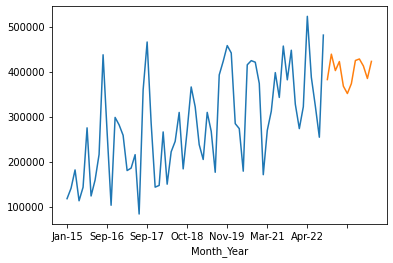

In [154]:
# Forecasting with ARIMA
arima_forecast = modelArima_fit.forecast(steps=12)  # Adjust steps as needed for your forecasting horizon
print(arima_forecast)


data['Sales'].plot();
arima_forecast.plot();

In [155]:
# Fit SARIMA model with the parameters obtained from the AutoARIMA technique
model_SARIMA = sm.tsa.statespace.SARIMAX(data['Sales'], order=(2, 1, 3), seasonal_order=(0, 1, 1, 12))
modelSarima_fit= sarima_model.fit()

# Forecasting with SARIMA
sarima_forecast = modelSarima_fit.forecast(steps=12)  # Adjust steps as needed for your forecasting horizon

print(sarima_forecast)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


65    452417.118912
66    395708.310580
67    418786.587203
68    452474.288580
69    449975.430242
70    385225.146401
71    410473.675194
72    493332.005733
73    379571.651534
74    426250.237940
75    412550.363232
76    509128.284820
Name: predicted_mean, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


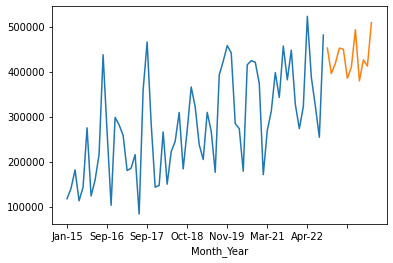

In [156]:
data['Sales'].plot();
sarima_forecast.plot();

#### Checking Accuracy

In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicted values
arima_pred = modelArima_fit.predict(start=data.index[0], end=data.index[-1], typ='levels')
sarima_pred = modelSarima_fit.predict(start=data.index[0], end=data.index[-1], typ='levels')

# Actual values
actual_values = data['Sales']

# MSE for both models
mse_arima = mean_squared_error(actual_values, arima_pred)
mse_sarima = mean_squared_error(actual_values, sarima_pred)

print(f'ARIMA Model MSE: {mse_arima}')
print(f'SARIMA Model MSE: {mse_sarima}')


# R-squared for both models
r2_arima = r2_score(actual_values, arima_pred)
r2_sarima = r2_score(actual_values, sarima_pred)

print(f'ARIMA Model R-squared: {r2_arima}')
print(f'SARIMA Model R-squared: {r2_sarima}')


ARIMA Model MSE: 8909699570.275791
SARIMA Model MSE: 8623152597.286406
ARIMA Model R-squared: 0.2652766722792751
SARIMA Model R-squared: 0.28890628446568745


In [185]:
# Work in progress

Trying the TRAIN-TEST SPLITTING approach to better understand about the accuracy of the model

In [186]:
# TRAIN - TEST  Split

In [187]:
data = pd.read_csv("H:/My Drive/M.Sc. BDA/Research_BDA/Sem_2/NirmaSales_TimeSeries_NA.csv", parse_dates = ['Month_Year'], index_col = 'Month_Year')


data = data.dropna()

In [188]:
split_index = int(len(data) * 0.80)

In [189]:
test = data[split_index:]

In [190]:
train = data[:split_index]#Train data

In [191]:
# MODEL FIT ON TRAINING DATA

In [192]:
# Fit SARIMA model with the parameters obtained from the AutoARIMA technique
train_model = sm.tsa.statespace.SARIMAX(train, order=(2, 1, 3), seasonal_order=(0, 1, 1, 12))
train_fit= sarima_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [193]:
forecast = train_fit.get_forecast(steps=len(test))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [194]:
mean = forecast.predicted_mean

In [195]:
CI = forecast.conf_int();CI

,lower Sales,upper Sales
65,244916.949209,659917.288615
66,146132.927567,645283.693594
67,161770.690446,675802.483961
68,194208.720564,710739.856595
69,185878.188966,714072.671519
70,113240.036893,657210.255908
71,138093.285424,682854.064964
72,218982.930977,767681.080488
73,100410.367891,658732.935176
74,145041.466558,707459.009323


In [184]:
r2_arima = r2_score(test, mean)